# Lab: Predicting Life Expectancy from BMI in Countries using Linear Regression


In this lab, you'll be working with data on the average life expectancy at birth and the average BMI for males across the world. The data comes from [Gapminder](https://www.gapminder.org/).

>BMI (Body Mass Index) is a measure of body fat based on height and weight that applies to adult men and women.

The data file can be found in the "bmi_and_life_expectancy.csv" file. It includes three columns, containing the following data:
* **Country** – The country the person was born in.  
* **Life expectancy** – The average life expectancy at birth for a person in that country.
* **BMI** – The mean BMI of males in that country. 

### You'll need to complete each of the following steps:

**1. Load the data**

**2. Build a linear regression model**

**3. Predict using the model**

# 1. Load and plot the data
* The data is in the file called "bmi_and_life_expectancy.csv".
* Use pandas [`read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) to load the data into a dataframe.
* Assign the dataframe to the variable `bmi_life_data`.


In [1]:
import numpy as np
import pandas as pd

In [14]:
# Done: Load the data in Pandas

bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")

# Print the data
bmi_life_data.describe()

,Life expectancy,BMI
count,163.000000,163.000000
mean,69.666933,24.792378
std,8.981933,2.427900
min,44.500000,19.866920
25%,63.450000,22.527940
50%,71.800000,25.320540
75%,76.500000,26.603960
max,84.600000,30.995630


Some helper functions:
- One to plot the data.
- One to plot any line, given the slope $m$ and the y-intercept $b$.

In [5]:
import matplotlib.pyplot as plt

x = np.array(bmi_life_data[["BMI"]])
y = np.array(bmi_life_data["Life expectancy"])

def draw_data(x, y):
    for i in range(len(x)):
        plt.scatter(x[i], y[i], color='blue', edgecolor='k')
    plt.xlabel('BMI')
    plt.ylabel('Life expectancy')

def display(m, b, color='g'):
    r = np.arange(min(x), max(x), 0.1)
    plt.plot(r, m*r+b, color)

Plotting the data

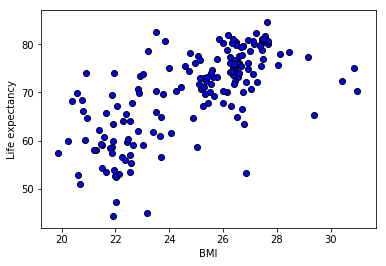

In [6]:
draw_data(x, y)
plt.show()

# 2. Build a Linear Regression Model
* Create a regression model and assign the weights to the array `bmi_life_model`.
* Fit the model to the data.

_Note:_

In [50]:
epochs = 1000
learning_rate = 0.001

# TODO: Finish the code for this function
def linear_regression(x, y):
    # Initialize m and b
    m=1
    b=0
    # TODO: Use the square trick to update the weights
    # and run it for a number of epochs
    last_loss = None
    for e in range(epochs):
        loss = []
        for xi, yi in zip(x, y):
            # 调整权重（weights）和偏差（bias）之前统计误差
            y_hat = m*xi + b
            error = abs((yi-y_hat))
            loss.append(error)
            
            y_hat = m*xi + b
            m = m + learning_rate*xi*(yi-y_hat)
            b = b + learning_rate*(yi-y_hat)
            
        # Printing out the mean error on the training set
        if e % (epochs / 5) == 0:
            loss = np.mean(np.array(loss))
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            loss = []
            print("=========")
            
    print("Iteration Finished!")
    print("m: ", m, "b: ", b)
    return(m, b)

m, b = linear_regression(x, y)

Epoch: 0
Train loss:  6.83949113783
Epoch: 200
Train loss:  6.4463241109
Epoch: 400
Train loss:  6.44080617208
Epoch: 600
Train loss:  6.43672622925
Epoch: 800
Train loss:  6.43370953514
Iteration Finished!
m:  [ 2.24041484] b:  [ 5.51640025]


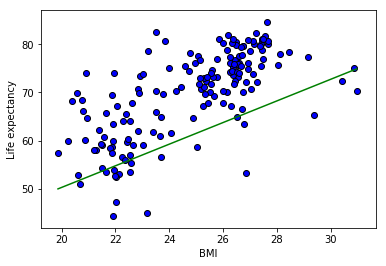

In [51]:
draw_data(x, y)
display(m[0], b[0])
plt.show()

# 3. Predict using the Model
* Predict using a BMI of 21.07931 and assign it to the variable `laos_life_exp`.

In [52]:
# Done: Write the prediction function
def predict(m, b, bmi):
    return bmi*m + b

In [54]:
laos_life_exp = predict(m[0], b[0], 21.07931)
laos_life_exp

52.742799255351606